In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [15]:
df = pd.read_csv("house_price_regression_dataset-Copy1.csv")
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [17]:
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [19]:
df.dtypes

Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object

In [21]:
df.House_Price.mean()

618861.0186467685

In [23]:
df.House_Price.std()

253568.05837542072

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [27]:
df.duplicated().sum()

0

In [29]:
df.corr(numeric_only=True)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


<Axes: >

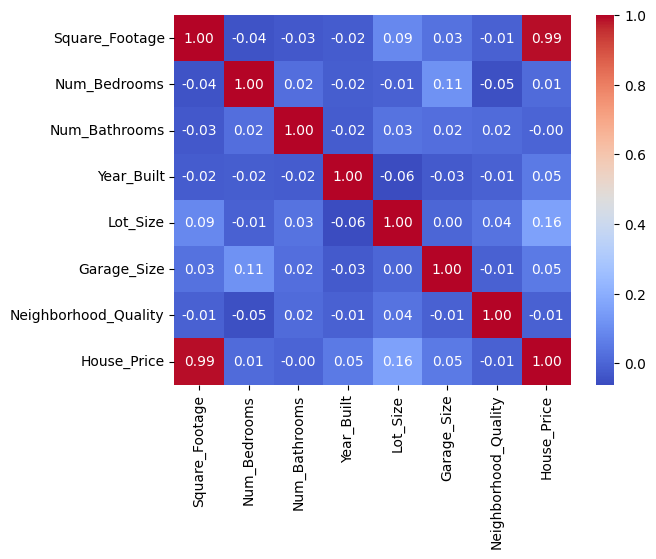

In [31]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: xlabel='Square_Footage', ylabel='House_Price'>

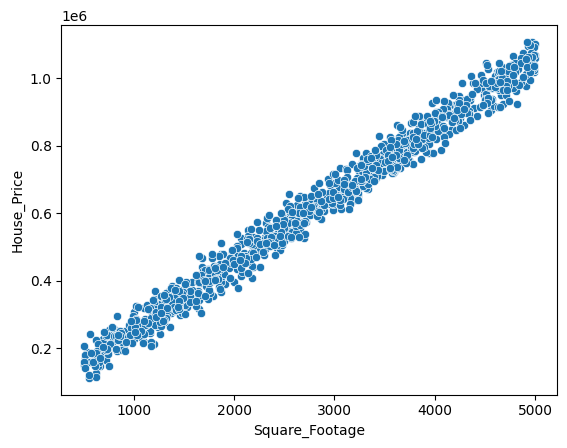

In [33]:
sns.scatterplot(df,x="Square_Footage",y="House_Price")

<Axes: xlabel='Square_Footage', ylabel='Count'>

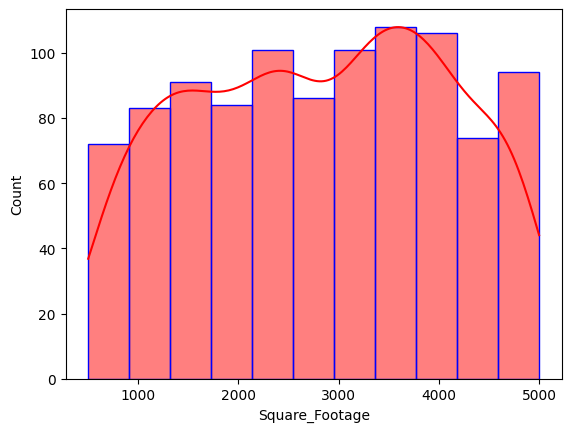

In [35]:
sns.histplot(df["Square_Footage"],kde=True,color="red",edgecolor="blue")

<Axes: xlabel='Num_Bedrooms', ylabel='House_Price'>

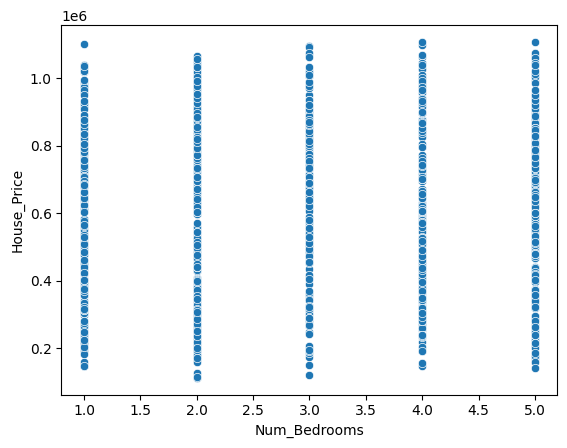

In [37]:
sns.scatterplot(df,x="Num_Bedrooms",y="House_Price")

<Axes: xlabel='Num_Bedrooms', ylabel='count'>

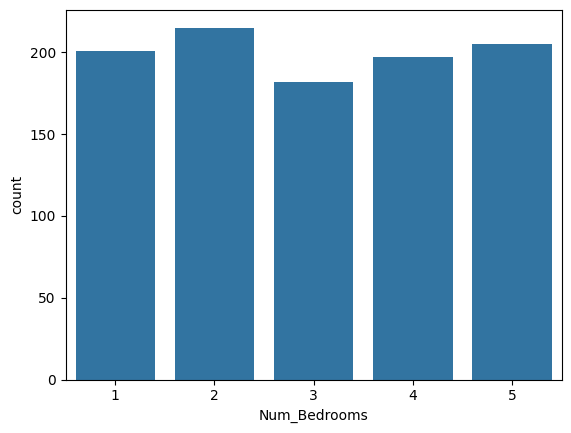

In [39]:
sns.countplot(df,x="Num_Bedrooms")

<Axes: xlabel='Num_Bedrooms', ylabel='Count'>

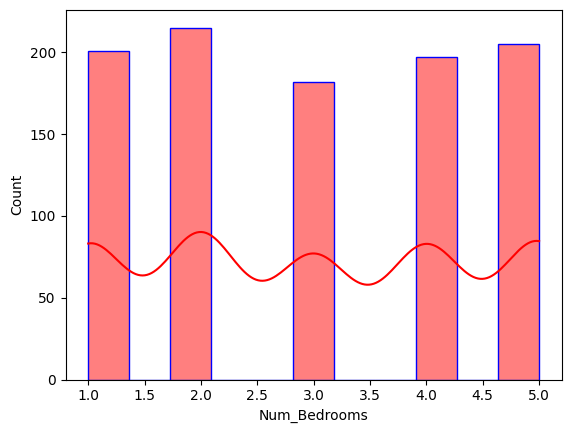

In [41]:
sns.histplot(df["Num_Bedrooms"],kde=True,color="red",edgecolor="blue")

<Axes: xlabel='Num_Bathrooms', ylabel='House_Price'>

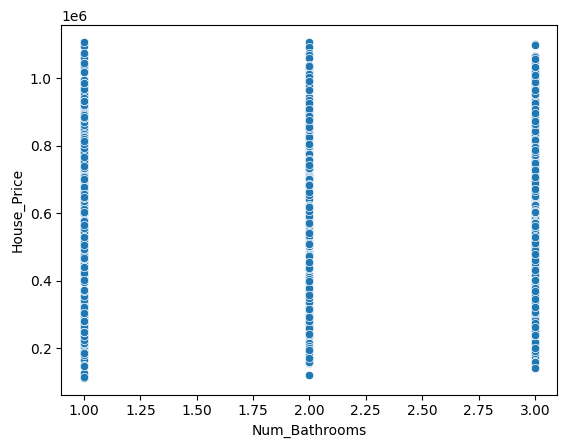

In [43]:
sns.scatterplot(df,x='Num_Bathrooms', y='House_Price',)

<Axes: xlabel='Year_Built', ylabel='House_Price'>

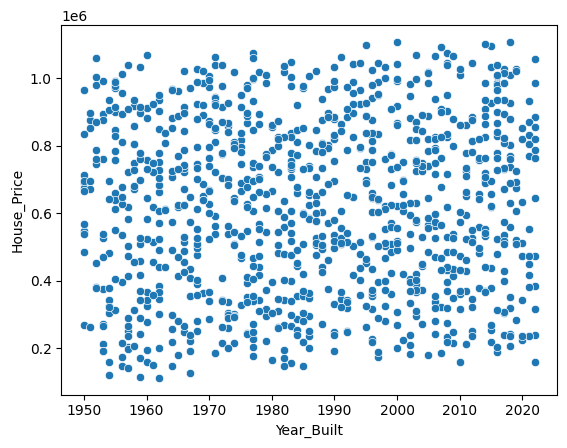

In [45]:
sns.scatterplot(x='Year_Built', y='House_Price', data=df)

<Axes: xlabel='Year_Built', ylabel='Count'>

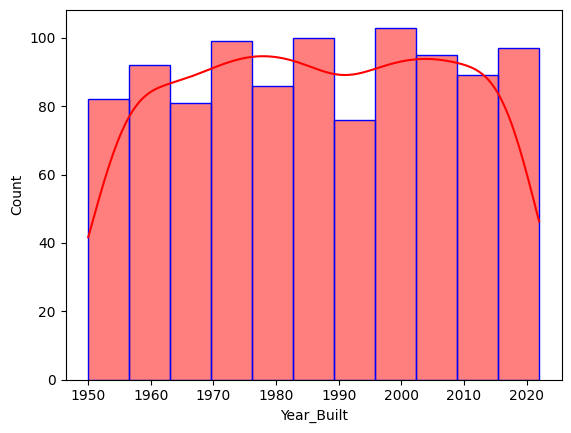

In [47]:
sns.histplot(df["Year_Built"],kde=True,color="red",edgecolor="blue")

<Axes: xlabel='Lot_Size', ylabel='House_Price'>

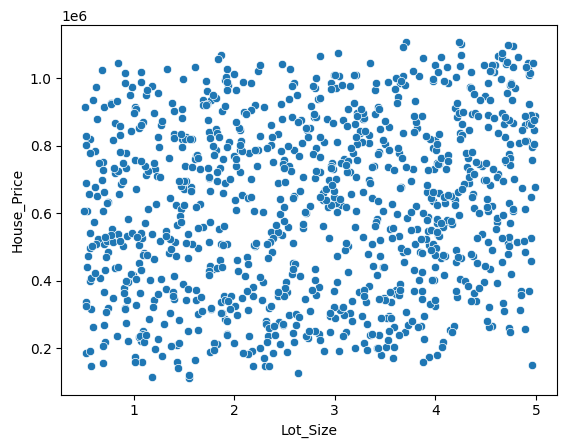

In [49]:
sns.scatterplot(df,x="Lot_Size",y="House_Price")

<Axes: xlabel='Lot_Size', ylabel='Count'>

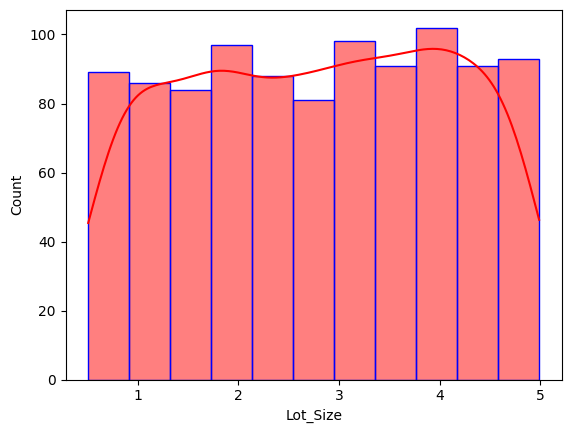

In [51]:
sns.histplot(df["Lot_Size"],kde=True,color="red",edgecolor="blue")

<Axes: xlabel='Neighborhood_Quality', ylabel='House_Price'>

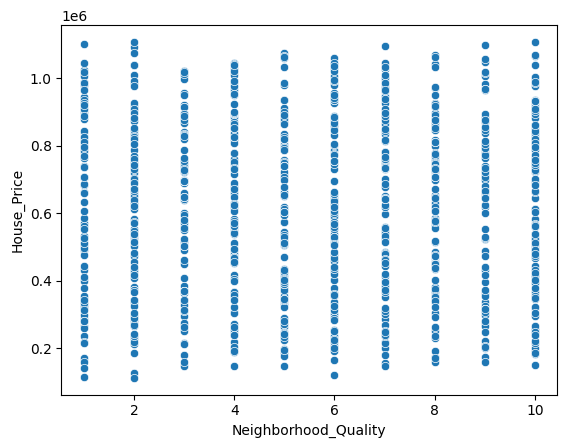

In [53]:
sns.scatterplot(x='Neighborhood_Quality', y='House_Price', data=df)

<Axes: xlabel='Garage_Size', ylabel='House_Price'>

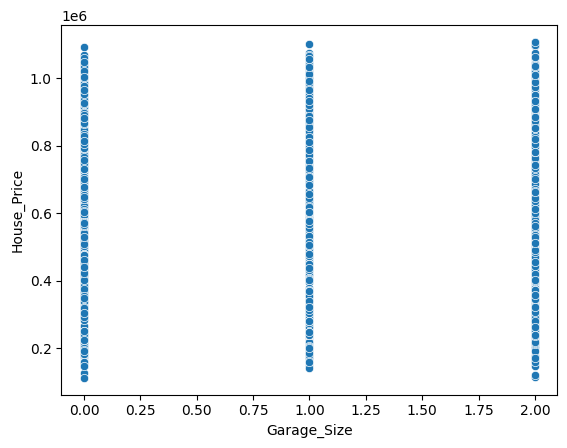

In [55]:
sns.scatterplot(x='Garage_Size', y='House_Price', data=df)

In [57]:
x=df.drop("House_Price",axis=1)

In [59]:
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


In [61]:
y=df[["House_Price"]]
y

,House_Price
0,2.623829e+05
1,9.852609e+05
2,7.779774e+05
3,2.296989e+05
4,1.041741e+06
...,...
995,7.014940e+05
996,6.837232e+05
997,5.720240e+05
998,9.648653e+05


In [63]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y_scaled, train_size=0.8,random_state=45)

In [67]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [69]:
model.score(x_test,y_test)

0.9983722475612922

In [71]:
y_predicted=model.predict(x_test)
y_predicted

array([[0.12756768],
       [0.05329386],
       [0.7808658 ],
       [0.72899003],
       [0.1204526 ],
       [0.92657205],
       [0.76749424],
       [0.72557915],
       [0.17055267],
       [0.39309198],
       [0.14550518],
       [0.72825932],
       [0.33645147],
       [0.10945725],
       [0.07831632],
       [0.87238936],
       [0.51436407],
       [0.198144  ],
       [0.38123886],
       [0.48800263],
       [0.73272407],
       [0.63721766],
       [0.64865439],
       [0.12997748],
       [0.09371068],
       [0.62071774],
       [0.4372569 ],
       [0.40901353],
       [0.3157778 ],
       [0.66192198],
       [0.90935559],
       [0.60663855],
       [0.12371461],
       [0.5648437 ],
       [0.62730609],
       [0.29711284],
       [0.55156963],
       [0.21994181],
       [0.69261988],
       [0.38212657],
       [0.63710309],
       [0.20588043],
       [0.64996893],
       [0.92021433],
       [0.11677783],
       [0.73717664],
       [0.85617549],
       [0.903

In [73]:
r2_score(y_test,y_predicted)

0.9983722475612922

In [75]:
mean_squared_error(y_test,y_predicted)

0.00010553043892035182

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Example: Load your dataset
df = pd.read_csv("house_price_regression_dataset.csv")  # Replace with your actual CSV file path


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy using R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score (Accuracy):", r2)

# Optional: Print RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


R² Score (Accuracy): 0.4526027629719196
RMSE: 53.85344583676592


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
